# Primera entrega del Proyecto Final #

# Objetivos Generales #

Es la de entender el problema e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science completo y eficaz.
Describir los datos y las relaciones entre datos mediante el Análisis Exploratorio de Datos (EDA).
Construir una presentación ejecutiva mostrando los resultados obtenidos.

# Presentación #

Es muy habitual entrar al gran mundo del Anime por alguna serie que nos recomiendan o por mera curiosidad, sea por la animacion, efectos, etc. Y es comun que al querer ver o seguir con otras series, encontrarse con una catalogo inmenso divididos en muchos generos, versiones alternativas. Debido a esto nos hacemos estas preguntas, ¿ Son todas las series de anime para todo el publico en general?. Si vi una que me gusto, ¿ las mas parecidas me gustaran? 

Estas son las preguntas que queremos responder en este proyecto y lo haremos con la ayuda de una gran base de datos proporcionada por la gran comunidad de cientificos de internet (KAGGLE). Este es el sitio de informacion y analisis de datos mas usado por los cientifico de datos. La base de datos que usare de este sitio, contiene toda esta informacion detallada.

Mi objetivo estaria en identificar la mejor manera de predecir que Anime podrian llegar a verse o gustar al finalizar la vista de alguno de ellos.

Integrantes:
Hector Alancay

Fuente de datos:

# Descripción de Datos - EDA #

In [1]:
# Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
#import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura de los Dataset
ratings = pd.read_csv("ratings.csv")
animes = pd.read_csv("animes.csv")

# Ratings

<ul>
<li>User_id: Id del usuario</li>
<li>Anime_id: Id del Anime</li>
<li>Rating: Puntuacion segun cada usuario</li>
 </ul>

In [4]:
ratings.head()

,user_id,anime_id,rating
0,1,454,3
1,1,28761,8
2,1,6682,5
3,1,9624,6
4,1,38101,7


In [30]:
# Verificamos los nulos por columna
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11039694 entries, 0 to 11039693
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 252.7 MB


In [31]:
ratings.shape

(11039694, 3)

In [27]:
ratings.describe()

,user_id,anime_id,rating
count,1.103969e+07,1.103969e+07,1.103969e+07
mean,5.394793e+04,1.459626e+04,6.341417e+00
std,3.194900e+04,1.277052e+04,3.327965e+00
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.542500e+04,2.476000e+03,6.000000e+00
50%,5.484600e+04,1.089700e+04,7.000000e+00
75%,8.179200e+04,2.542900e+04,9.000000e+00
max,1.080240e+05,4.867200e+04,1.000000e+01


In [40]:
ratings.isnull()

,user_id,anime_id,rating
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
11039689,False,False,False
11039690,False,False,False
11039691,False,False,False
11039692,False,False,False


In [41]:
ratings.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [42]:
#Principales Estadisticas
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,11039694.0,53947.934797,31949.003608,1.0,25425.0,54846.0,81792.0,108024.0
anime_id,11039694.0,14596.255021,12770.518868,1.0,2476.0,10897.0,25429.0,48672.0
rating,11039694.0,6.341417,3.327965,0.0,6.0,7.0,9.0,10.0


# Anime

<ul>
    <li>Anime_id: Es el numero de identificacion de cada Anime</li>
    <li>Title: Nombre del Anime</li>
    <li>Genres: Es el genero al que pertenece, es muy variado y pueden tener mas de un genero.</li>
    <li>Media:</li>
    <li>Episodes: Cantidad de episodios</li>
    <li>Ratings: Puntuacion segun usuarios</li>
    <li> Members: Cantidad de usuarios</li>
    <li>Start_Date: Fecha de estreno</li>
    <li>Season: Temporada en la que se estreno</li>
    <li>Source: Origen del anime (original, manga, novela, novela visual, novela ligera, juegos, otros, etc)</li>
    
</ul>

In [6]:
animes.head(100)

,anime_id,title,genres,media,episodes,rating,members,start_date,season,source
0,1,Cowboy Bebop,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",tv,26,8.77,1324054.0,1998/4/3,spring_1998,original
1,5,Cowboy Bebop: Tengoku no Tobira,"Action,Drama,Mystery,Sci-Fi,Space",movie,1,8.39,284827.0,2001/9/1,summer_2001,original
2,6,Trigun,"Action,Sci-Fi,Adventure,Comedy,Drama,Shounen",tv,26,8.23,578887.0,1998/4/1,spring_1998,manga
3,7,Witch Hunter Robin,"Action,Mystery,Police,Supernatural,Drama,Magic",tv,26,7.27,96487.0,2002/7/2,summer_2002,original
4,8,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",tv,52,6.97,13450.0,2004/9/30,fall_2004,manga
...,...,...,...,...,...,...,...,...,...,...
95,116,El Hazard: The Wanderers,"Adventure,Comedy,Romance,Fantasy",tv,26,6.96,14977.0,1995/10/6,fall_1995,original
96,117,El Hazard: The Magnificent World,"Adventure,Comedy,Romance,Fantasy",ova,7,7.30,15725.0,1995/5/26,spring_1995,original
97,118,El Hazard 2: The Magnificent World,"Adventure,Comedy,Fantasy",ova,4,6.84,7874.0,1997/3/21,winter_1997,original
98,119,Final Approach,"Comedy,Drama,Romance,Slice of Life",tv,13,6.55,32152.0,2004/10/3,fall_2004,visual_novel


In [12]:
#Hacemos lo mismo con este segundo dataset
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15221 entries, 0 to 15220
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    15221 non-null  int64  
 1   title       15221 non-null  object 
 2   genres      15218 non-null  object 
 3   media       15221 non-null  object 
 4   episodes    15221 non-null  int64  
 5   rating      11876 non-null  float64
 6   members     15205 non-null  float64
 7   start_date  15221 non-null  object 
 8   season      15221 non-null  object 
 9   source      12294 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [14]:
print(animes.shape)
print(animes.drop_duplicates().shape)
print(animes.info())
animes.tail(15)

(15221, 10)
(15221, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15221 entries, 0 to 15220
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    15221 non-null  int64  
 1   title       15221 non-null  object 
 2   genres      15218 non-null  object 
 3   media       15221 non-null  object 
 4   episodes    15221 non-null  int64  
 5   rating      11876 non-null  float64
 6   members     15205 non-null  float64
 7   start_date  15221 non-null  object 
 8   season      15221 non-null  object 
 9   source      12294 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB
None


,anime_id,title,genres,media,episodes,rating,members,start_date,season,source
15206,42364,Re:Zero kara Hajimeru Break Time 2nd Season,"Adventure,Comedy,Parody,Fantasy",special,25,7.21,18898.0,2020/7/10,summer_2020,light_novel
15207,42366,Yasai no Yousei: N.Y. Salad The Movie,"Kids,Fantasy",movie,1,NaN,50.0,2010/2/13,winter_2010,original
15208,42367,Yasai no Yousei: N.Y. Salad Special,"Kids,Fantasy",special,1,NaN,50.0,2014/4/29,spring_2014,original
15209,42372,Xiao Hua Xian 4th Season: Shou Hu Tian Shi 2,"Kids,Magic",ona,40,NaN,69.0,2018/6/29,spring_2018,game
15210,42373,Xiao Hua Xian 5th Season: Si Shi Huayu - Chun Xia,"Kids,Magic",ona,26,NaN,62.0,2019/7/24,summer_2019,game
15211,42378,We Two,Music,music,1,NaN,158.0,2019/4/10,spring_2019,original
15212,42380,Re:I Am,"Music,Romance,Space",music,1,6.21,302.0,2013/3/20,winter_2013,original
15213,42381,Yuki no Furu Machi,"Music,Romance",music,1,NaN,132.0,2012/2/23,winter_2012,original
15214,42387,"Hataraku Saibou!!: Saikyou no Teki, Futatabi. ...","Action,Comedy,Shounen",movie,1,7.27,19413.0,2020/9/5,summer_2020,manga
15215,42391,Osomatsu-san 3rd Season,"Comedy,Parody",tv,25,7.27,14856.0,2020/10/13,fall_2020,manga


In [35]:
#cambio el formato de la columna episodio
animes["episodes"] = animes["episodes"].astype(int)

In [22]:
animes.head(20)

,anime_id,title,genres,media,episodes,rating,members,start_date,season,source
0,1,Cowboy Bebop,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",tv,26.0,8.77,1324054.0,1998/4/3,spring_1998,original
1,5,Cowboy Bebop: Tengoku no Tobira,"Action,Drama,Mystery,Sci-Fi,Space",movie,1.0,8.39,284827.0,2001/9/1,summer_2001,original
2,6,Trigun,"Action,Sci-Fi,Adventure,Comedy,Drama,Shounen",tv,26.0,8.23,578887.0,1998/4/1,spring_1998,manga
3,7,Witch Hunter Robin,"Action,Mystery,Police,Supernatural,Drama,Magic",tv,26.0,7.27,96487.0,2002/7/2,summer_2002,original
4,8,Bouken Ou Beet,"Adventure,Fantasy,Shounen,Supernatural",tv,52.0,6.97,13450.0,2004/9/30,fall_2004,manga
5,15,Eyeshield 21,"Action,Sports,Comedy,Shounen",tv,145.0,7.94,152647.0,2005/4/6,spring_2005,manga
6,16,Hachimitsu to Clover,"Comedy,Drama,Josei,Romance,Slice of Life",tv,24.0,8.05,220209.0,2005/4/15,spring_2005,manga
7,17,Hungry Heart: Wild Striker,"Slice of Life,Comedy,Sports,Shounen",tv,52.0,7.58,20934.0,2002/9/11,fall_2002,manga
8,18,Initial D Fourth Stage,"Action,Cars,Sports,Drama,Seinen",tv,24.0,8.14,124265.0,2004/4/17,spring_2004,manga
9,19,Monster,"Drama,Horror,Mystery,Police,Psychological,Sein...",tv,74.0,8.77,662260.0,2004/4/7,spring_2004,manga


In [32]:
animes.describe()

,anime_id,episodes,rating,members
count,15221.000000,15221.000000,11876.000000,1.520500e+04
mean,19809.920307,12.247290,6.541579,4.198752e+04
std,14666.072993,49.837976,0.890091,1.429566e+05
min,1.000000,0.000000,0.000000,1.600000e+01
25%,4841.000000,1.000000,5.990000,5.250000e+02
50%,18691.000000,2.000000,6.540000,3.106000e+03
75%,34699.000000,12.000000,7.160000,1.842100e+04
max,42400.000000,3057.000000,9.180000,2.780502e+06


In [33]:
#Cada género está separado por un ","", para simplificar lo transformo a una lista
animes['genres'] = animes.genres.str.split('|')
animes.head()

,anime_id,title,genres,media,episodes,rating,members,start_date,season,source
0,1,Cowboy Bebop,"[Action,Adventure,Comedy,Drama,Sci-Fi,Space]",tv,26.0,8.77,1324054.0,1998/4/3,spring_1998,original
1,5,Cowboy Bebop: Tengoku no Tobira,"[Action,Drama,Mystery,Sci-Fi,Space]",movie,1.0,8.39,284827.0,2001/9/1,summer_2001,original
2,6,Trigun,"[Action,Sci-Fi,Adventure,Comedy,Drama,Shounen]",tv,26.0,8.23,578887.0,1998/4/1,spring_1998,manga
3,7,Witch Hunter Robin,"[Action,Mystery,Police,Supernatural,Drama,Magic]",tv,26.0,7.27,96487.0,2002/7/2,summer_2002,original
4,8,Bouken Ou Beet,"[Adventure,Fantasy,Shounen,Supernatural]",tv,52.0,6.97,13450.0,2004/9/30,fall_2004,manga


In [38]:
animes.isnull() #Aca podemos ver que columna tiene nulos

,anime_id,title,genres,media,episodes,rating,members,start_date,season,source
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15216,False,False,False,False,False,False,False,False,False,False
15217,False,False,False,False,False,False,False,False,False,False
15218,False,False,False,False,False,True,False,False,False,True
15219,False,False,False,False,False,True,False,False,False,True


In [39]:
animes.isnull().sum() # Aqui sumamos la cantidad de nulos que posee cada columna

anime_id         0
title            0
genres           3
media            0
episodes         0
rating        3345
members         16
start_date       0
season           0
source        2927
dtype: int64

In [43]:
#Principales Estadisticas
animes.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,15221.0,19809.920307,14666.072993,1.0,4841.00,18691.00,34699.00,42400.00
episodes,15221.0,12.247290,49.837976,0.0,1.00,2.00,12.00,3057.00
rating,11876.0,6.541579,0.890091,0.0,5.99,6.54,7.16,9.18
members,15205.0,41987.521079,142956.593424,16.0,525.00,3106.00,18421.00,2780502.00


Resúmen de los datos: trabajaremos sobre dos datasets, los cuales poseen mucha informacion para lo que se quiere aplicar, como dije anteriormente encontramos en uno de ellos dos columnas con valores nulos pero no los limpiare ya que nos va a servir para los distintos tipo de analisis que se realizaran y a su vez se complementaran entre si y el analisis se centrará en el RATING para poder recomendar las series de anime y hacer las diferentes comparativas.

# Analisis Univariado

## Ratings

### Este DataSet NO cuenta con variables categoricas

In [47]:
ratings.rating.describe()

count    1.103969e+07
mean     6.341417e+00
std      3.327965e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [46]:
#Valores distintos para rating
ratings[['rating']].value_counts()

rating
8         2377750
0         2024392
7         1983712
9         1751785
10        1282581
6          919652
5          408962
4          160700
3           67615
2           36531
1           26014
dtype: int64

In [49]:
#Valores distintos para anime_id
ratings[['anime_id']].value_counts()

anime_id
1535        49595
16498       42666
11757       40829
6547        34873
5114        34531
            ...  
37553           1
37552           1
37550           1
37549           1
48672           1
Length: 12043, dtype: int64

In [50]:
#Valores distintos para user_id
ratings[['user_id']].value_counts()

user_id
66845      1000
3629       1000
1325       1000
87196       999
96661       999
           ... 
81217         1
37309         1
48957         1
7495          1
69693         1
Length: 86954, dtype: int64

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'anime_id'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

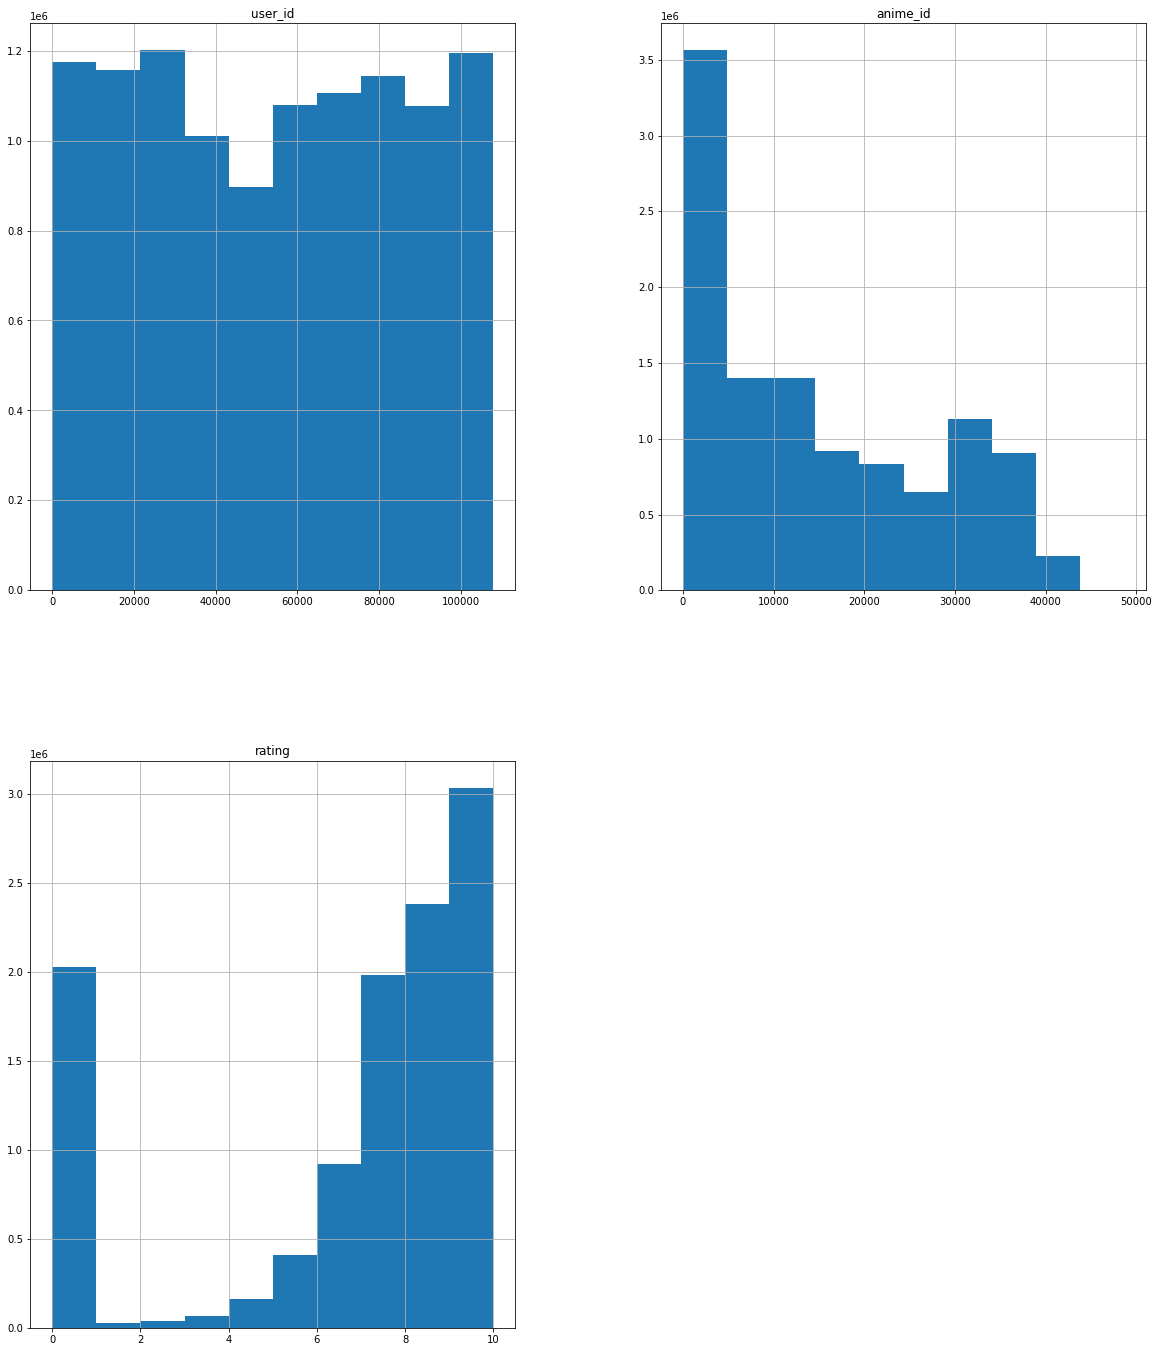

In [48]:
#Genero un grafico para columna 
ratings.hist(figsize=(20,24), bins=10)

##  Animes

### Este DataSet tiene variables categoricas 

In [55]:
animes['anime_id'].value_counts()

32768    1
7529     1
3403     1
1493     1
23889    1
        ..
8961     1
35588    1
33541    1
6918     1
2047     1
Name: anime_id, Length: 15221, dtype: int64

In [52]:
animes['episodes'].value_counts()

1       6746
12      1412
2       1332
13       736
3        604
        ... 
475        1
331        1
291        1
283        1
1471       1
Name: episodes, Length: 200, dtype: int64

In [53]:
animes['members'].value_counts()

137.0      23
242.0      21
146.0      21
247.0      21
183.0      21
           ..
3492.0      1
4487.0      1
18434.0     1
34697.0     1
11301.0     1
Name: members, Length: 9318, dtype: int64

In [59]:
animes['rating'].value_counts()

6.87    69
6.39    68
6.42    68
6.28    67
7.06    66
        ..
4.22     1
4.07     1
3.28     1
3.08     1
8.61     1
Name: rating, Length: 510, dtype: int64

array([[<AxesSubplot:title={'center':'anime_id'}>,
        <AxesSubplot:title={'center':'episodes'}>],
       [<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'members'}>]], dtype=object)

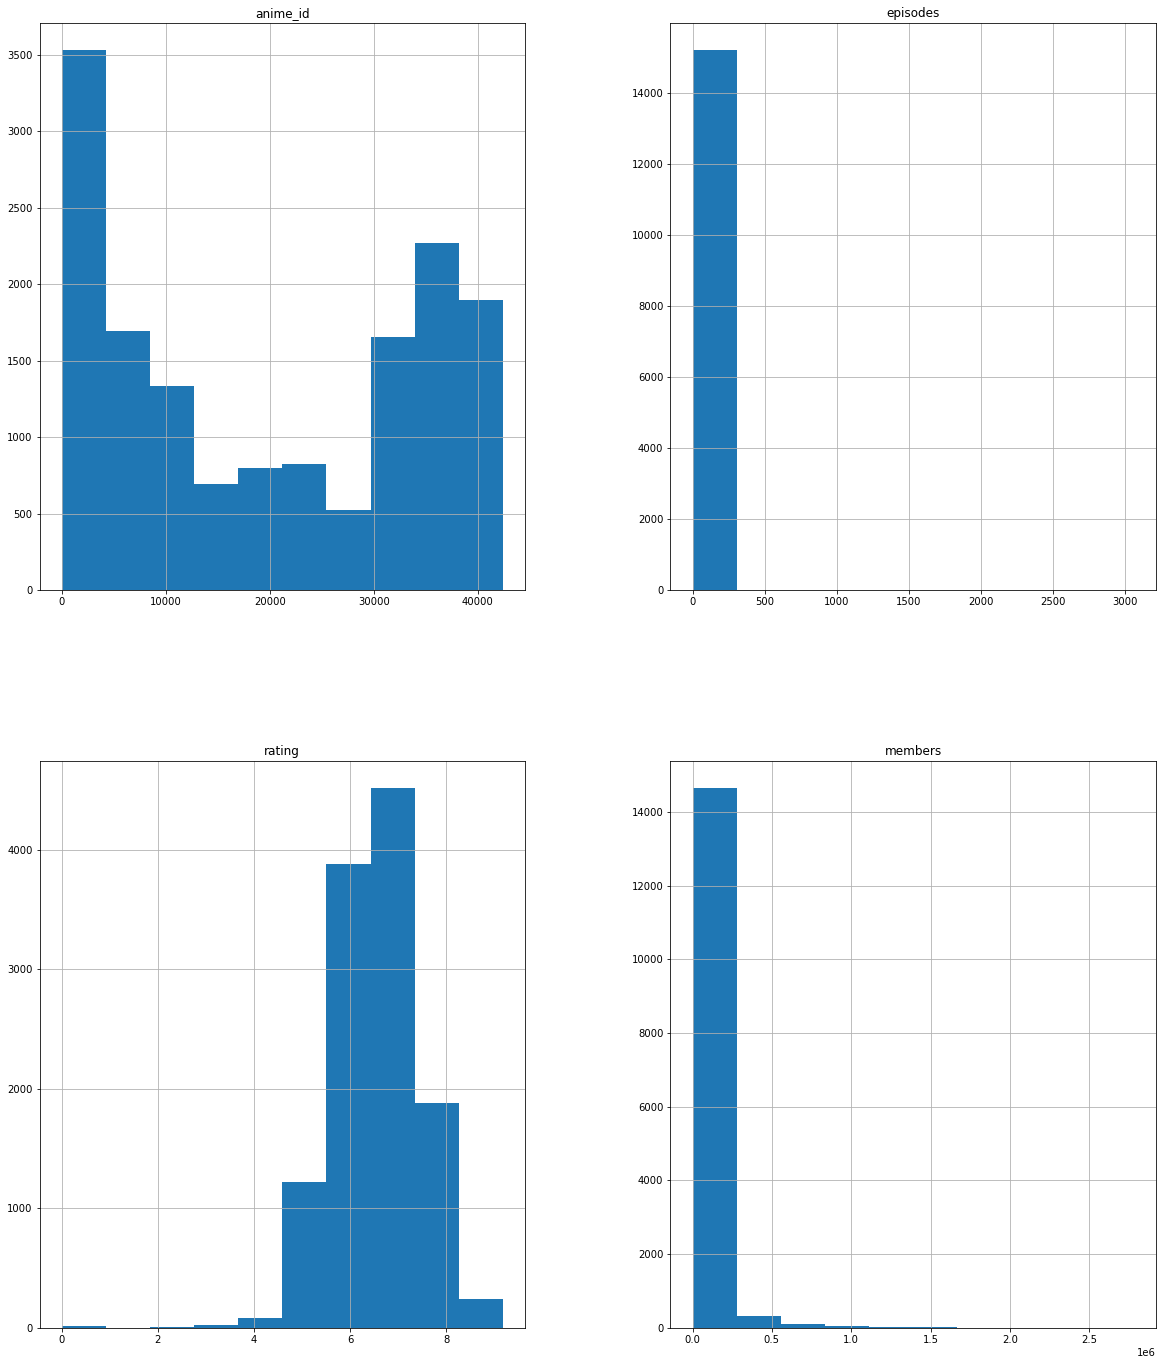

In [58]:
#Genero un grafico para columna 
animes.hist(figsize=(20,24), bins=10)
   

#### Variables categoricas

In [62]:
#Source
frec = animes['source'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'source':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(animes['source'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
original,4202,4202,27.606596,27.606596
manga,3609,7811,23.710663,51.317259
visual_novel,975,8786,6.405624,57.722883
game,815,9601,5.354445,63.077327
light_novel,725,10326,4.763156,67.840484
other,456,10782,2.995861,70.836345
novel,438,11220,2.877603,73.713948
4_koma_manga,277,11497,1.819854,75.533802
music,276,11773,1.813284,77.347086
web_manga,233,12006,1.530780,78.877866


In [64]:
#Source
frec = animes['media'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'media':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(animes['media'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
tv,4655,4655,30.582748,30.582748
ova,3383,8038,22.225872,52.808620
movie,2261,10299,14.854477,67.663097
special,2014,12313,13.231719,80.894816
ona,1646,13959,10.814007,91.708823
music,1262,15221,8.291177,100.000000


In [65]:
#Source
frec = animes['season'].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'season':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(animes['season'])

#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
fall_2016,259,259,1.701596,1.701596
fall_2017,240,499,1.576769,3.278365
spring_2017,237,736,1.557059,4.835425
fall_2018,225,961,1.478221,6.313646
summer_2017,225,1186,1.478221,7.791867
...,...,...,...,...
fall_1955,1,15217,0.006570,99.973721
spring_1927,1,15218,0.006570,99.980290
winter_1960,1,15219,0.006570,99.986860
winter_1958,1,15220,0.006570,99.993430


<ipython-input-77-8753149afd73>:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace = 0.7, hspace=0.8)


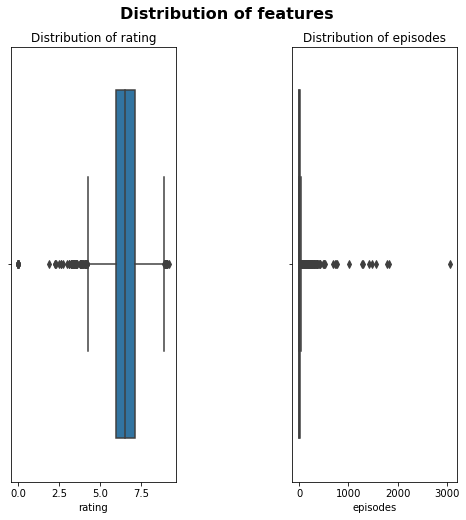

In [77]:
# Analisis de la distribucion usando boxplots
columns = ['rating','episodes']

fig, axes = plt.subplots(1, 2, figsize=(8, 8), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=16, weight='bold')

ax = sns.boxplot(ax = axes[0], data=animes, x=columns[0])
ax.set_title(f'Distribution of {columns[0]}')

ax1 = sns.boxplot(ax = axes[1], data=animes, x=columns[1])
ax1.set_title(f'Distribution of {columns[1]}')


plt.show()

# Análisis Bivariado #

# Primer Analisis

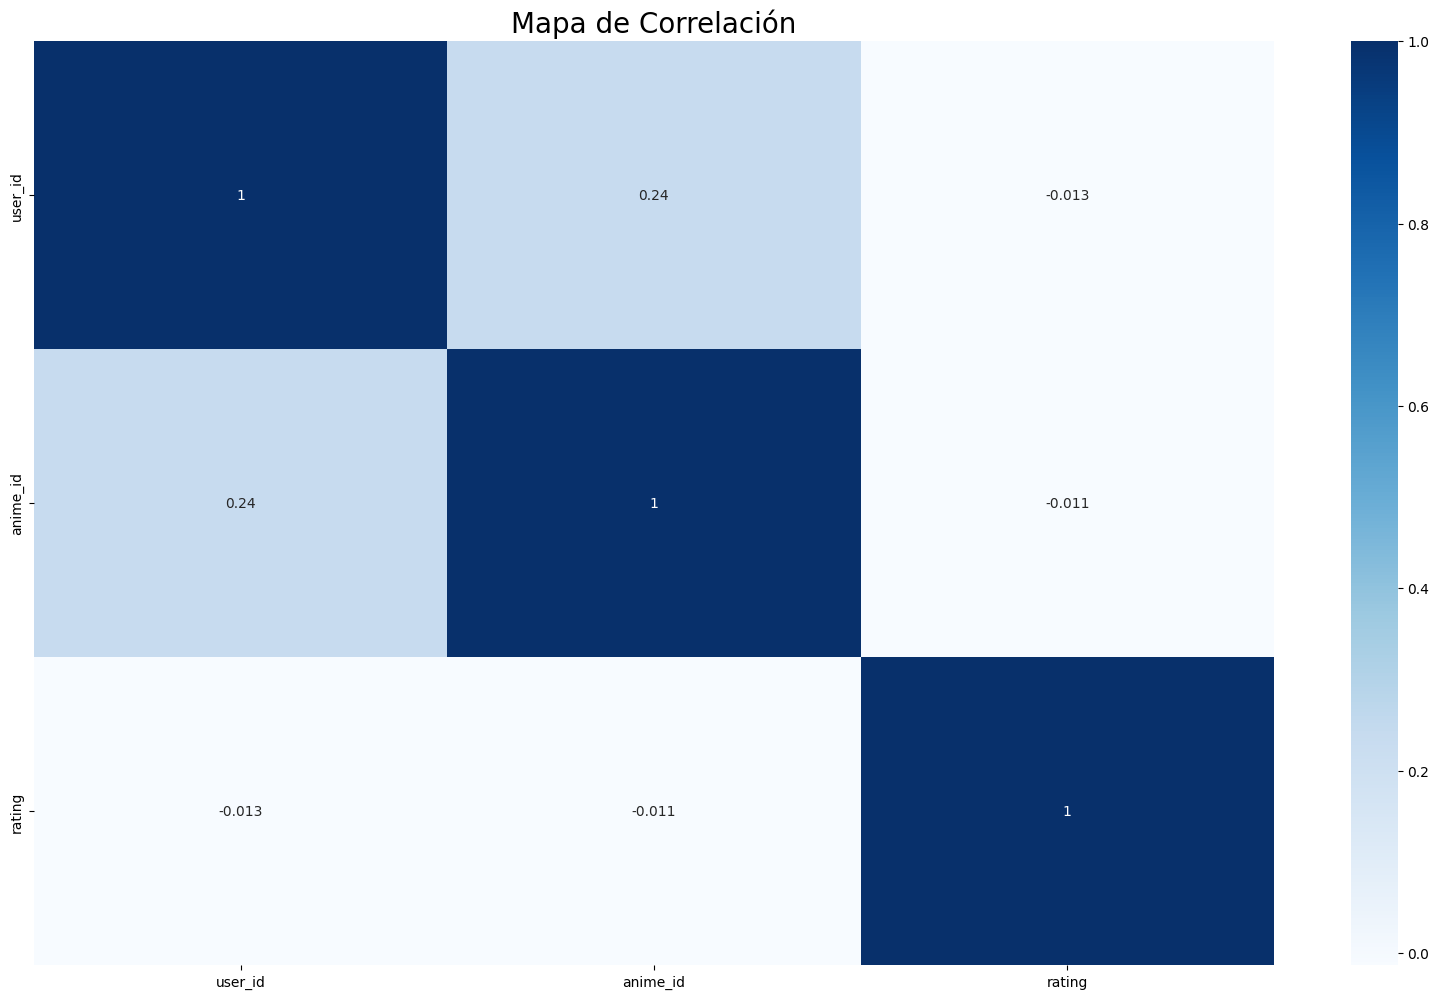

In [73]:
plt.figure(figsize=(20, 12))
sns.reset_orig()
sns.heatmap(ratings.corr(), annot = True, cmap = 'Blues')
plt.title('Mapa de Correlación', fontsize = 20)
plt.show()

# Segundo analisis

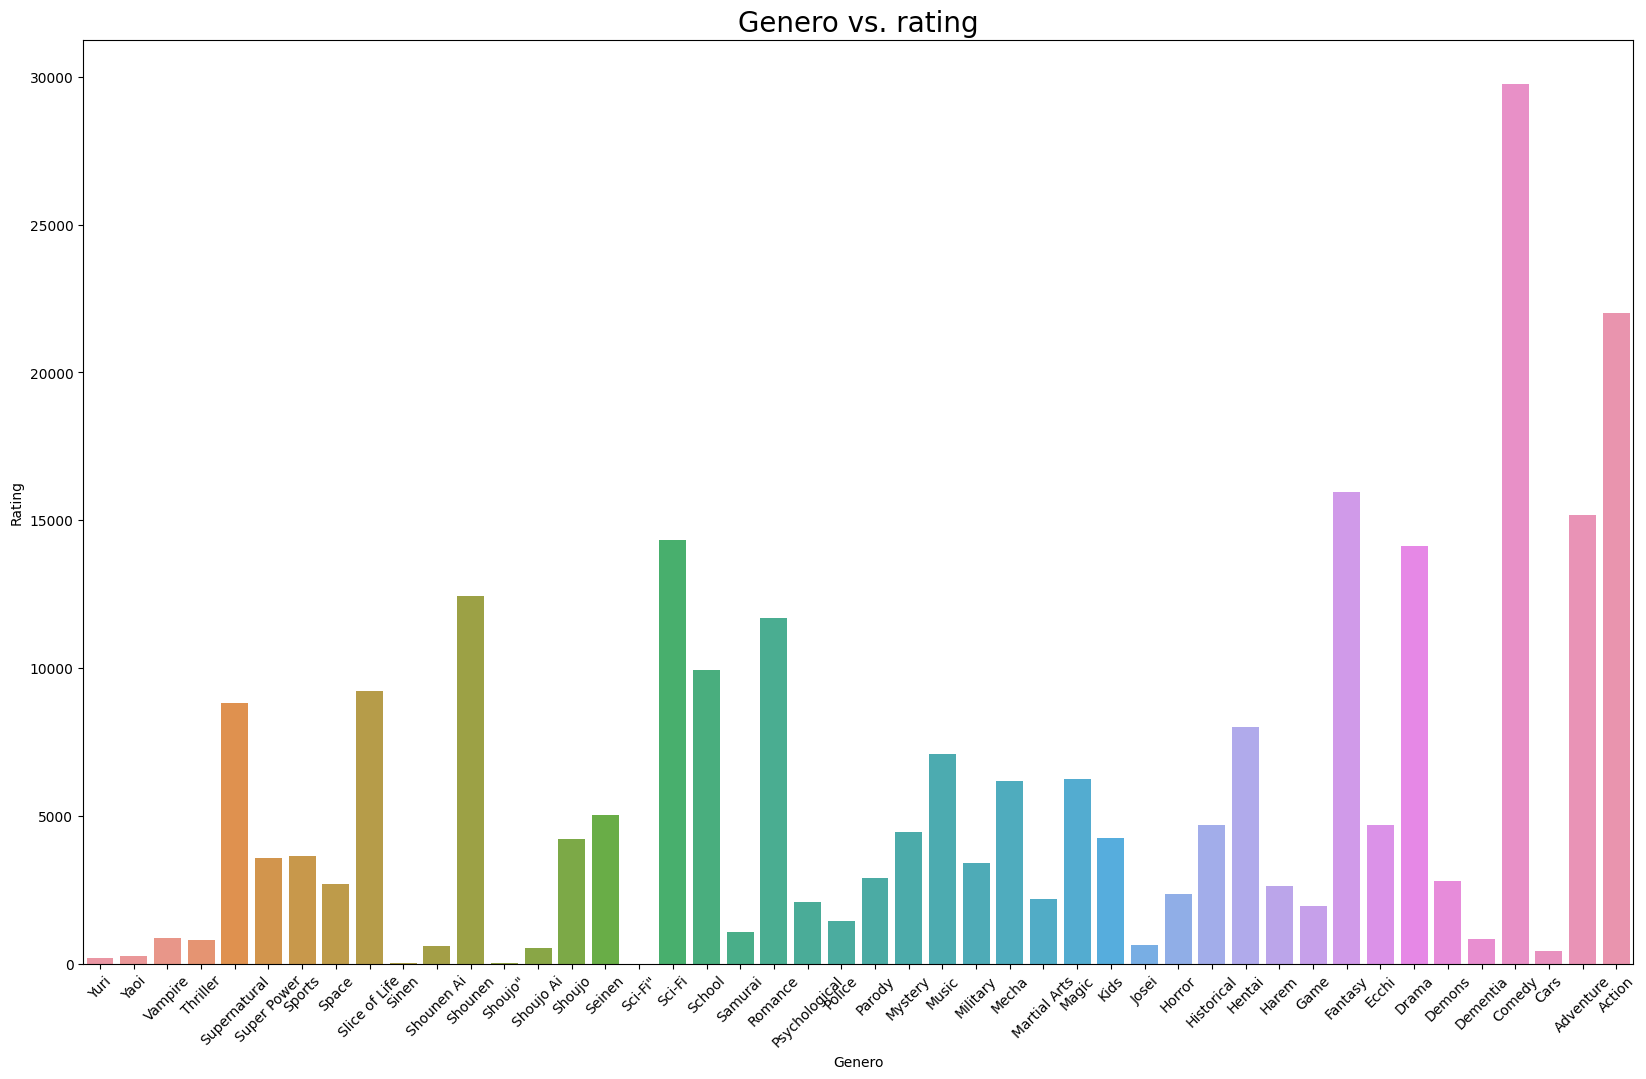

In [94]:
#Primero nos quedamos con las columnas que queremos
df1=animes[['rating','genres']]
#Como una misma serie de anime tiene varios generos, el campo genre tiene multiples valores separados, por lo tanto tendre que primero transformarlo en lista y luego separarlo:
df1 = df1.assign(**{'genres':animes['genres'].str.split(',')})
df1=df1.explode('genres')
#Ahora vamos a borrar los espacios que quedaron de los nuevos valores que separe
df1['genres'] = df1['genres'].str.strip()
#Finalmente procedo a crear el conjunto agrupado por suma y a graficar
dfbar = df1[['genres', 'rating']].groupby(['genres'], as_index=False).sum().sort_values(by='genres', ascending=False)
plt.figure(figsize=(20,12))
sns.barplot(x='genres', y='rating', data=dfbar)
plt.title('Genero vs. rating', fontsize = 20)
plt.xlabel('Genero')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.show()

In [ ]:
Aqui podemos ver que en los generos que tiene mayor RATING son COMEDIA, ACCION, FANTASIA, AVENTURA Y DRAMA.

# Tercer analisis

Hare un análisis del comportamiento de la cantidad de miembros fans de una serie frente a los animes del dataset y agrupare los mismos con mayor cantidad de miembros (top 10)

In [211]:
dfanimes = animes[['title', 'members' ]].groupby(by=['title'], as_index=False).count().sort_values(by=['title','members'])
top = dfanimes.head(10)
top

,title,members
0,"""0""",1
1,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",1
2,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",1
3,"""Bungaku Shoujo"" Memoire",1
4,"""Bungaku Shoujo"" Movie",1
5,"""Calpis"" Hakkou Monogatari",1
6,"""Eiji""",1
7,"""Eikou Naki Tensai-tachi"" Kara no Monogatari",1
8,"""Eiyuu"" Kaitai",1
9,"""Kinako"" Movie x Mameshiba",1


# Análisis Multivariado

Mi primer objetivo será comparar la variable members con el resto de las variables utilizando el grafico Pairplot.

Correlacion entre Miembros y rating ==>  0.4092887538848241


<Figure size 2000x1200 with 0 Axes>

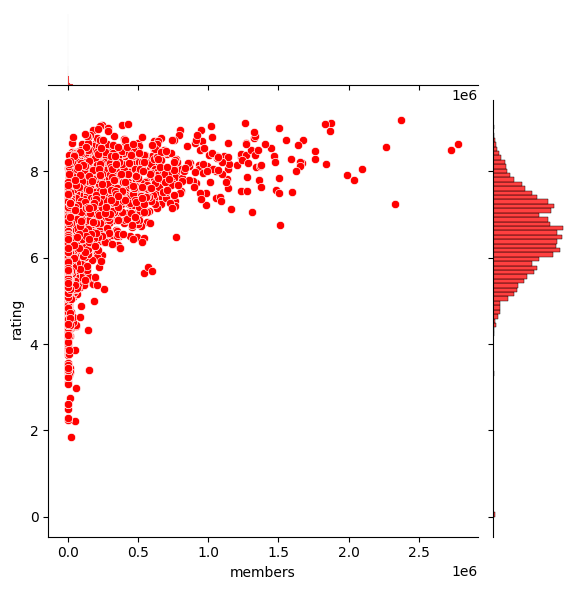

Correlacion entre Miembros y members ==>  1.0


<Figure size 2000x1200 with 0 Axes>

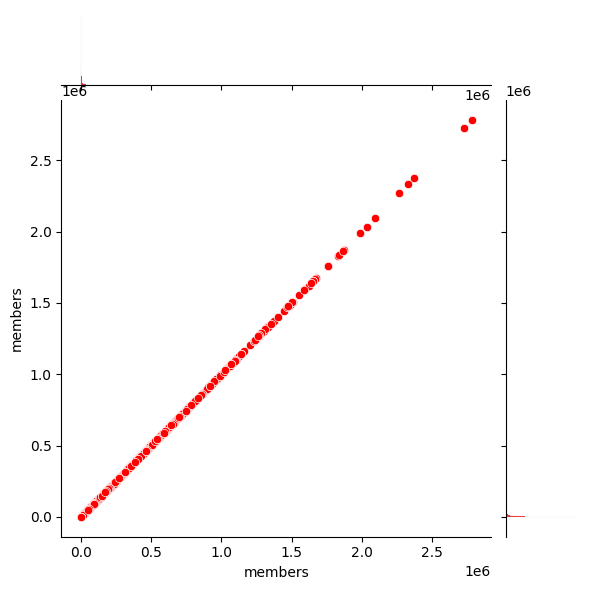

Correlacion entre Miembros y episodes ==>  0.04969912776663311


<Figure size 2000x1200 with 0 Axes>

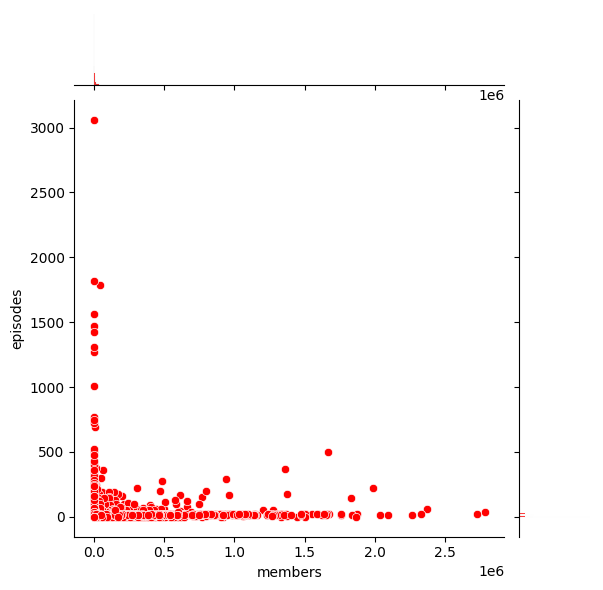

In [232]:
col=['rating', 'members', 'episodes']
for i in col:
  print(f"Correlacion entre Miembros y {i} ==> ",animes.corr().loc['members'][i])
  plt.figure(figsize=(20,12))
  sns.jointplot(x='members',y=i,data=animes,kind = 'scatter',color = 'red')
  plt.xlabel('members')
  plt.show()


# 2do Análisis - Género
Queremos saber donde se ubican las series de Comedia dentro del espectro 'rating' vs 'members'.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1500x1000 with 0 Axes>

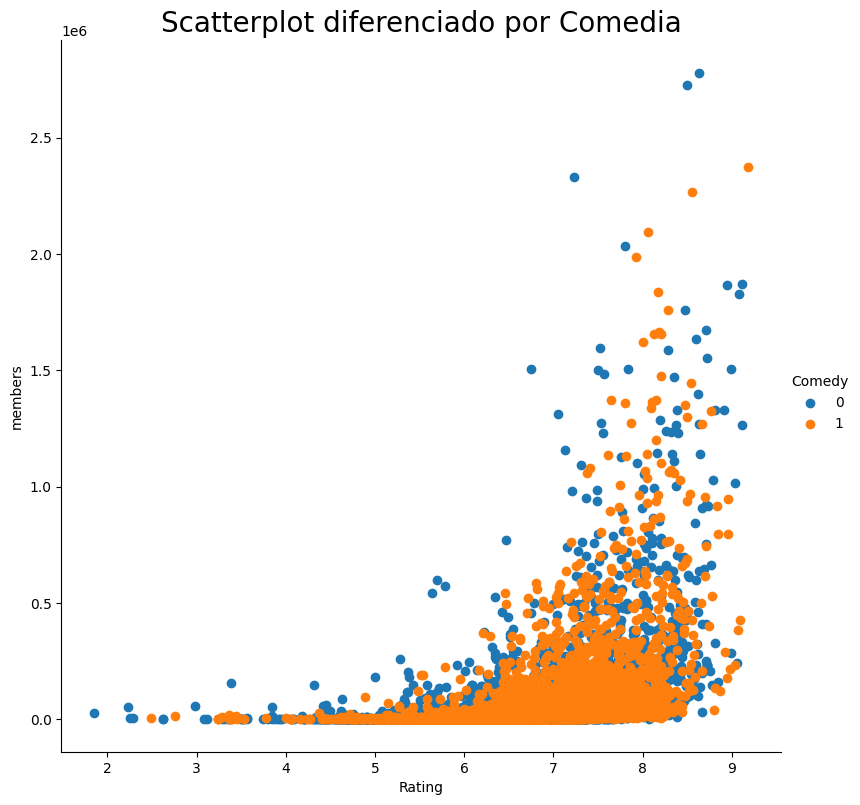

In [221]:
#Primero creamos un nuevo campo que nos dice si una pelicula pertenece al genero comedia
animes['Comedy'] = [1 if s >=0 else 0 for s in animes['genres'].str.find('Comedy')] 
#Luego procedemos a realizar un scatterplot de rating vs members diferenciado por si la serie es una comedia o no
plt.figure(figsize=(15, 10))
sns.FacetGrid(animes,hue = 'Comedy' , size = 8).map(plt.scatter,'rating','members').add_legend();
plt.title('Scatterplot diferenciado por Comedia', fontsize = 20)
plt.xlabel('Rating')
plt.show()

Podemos notar una gran concentracion de muy alta puntuacion de rating y con esto podemos ver que las series de comedia tiene muy buena puntuacion y gran cantidad de miembros fans.

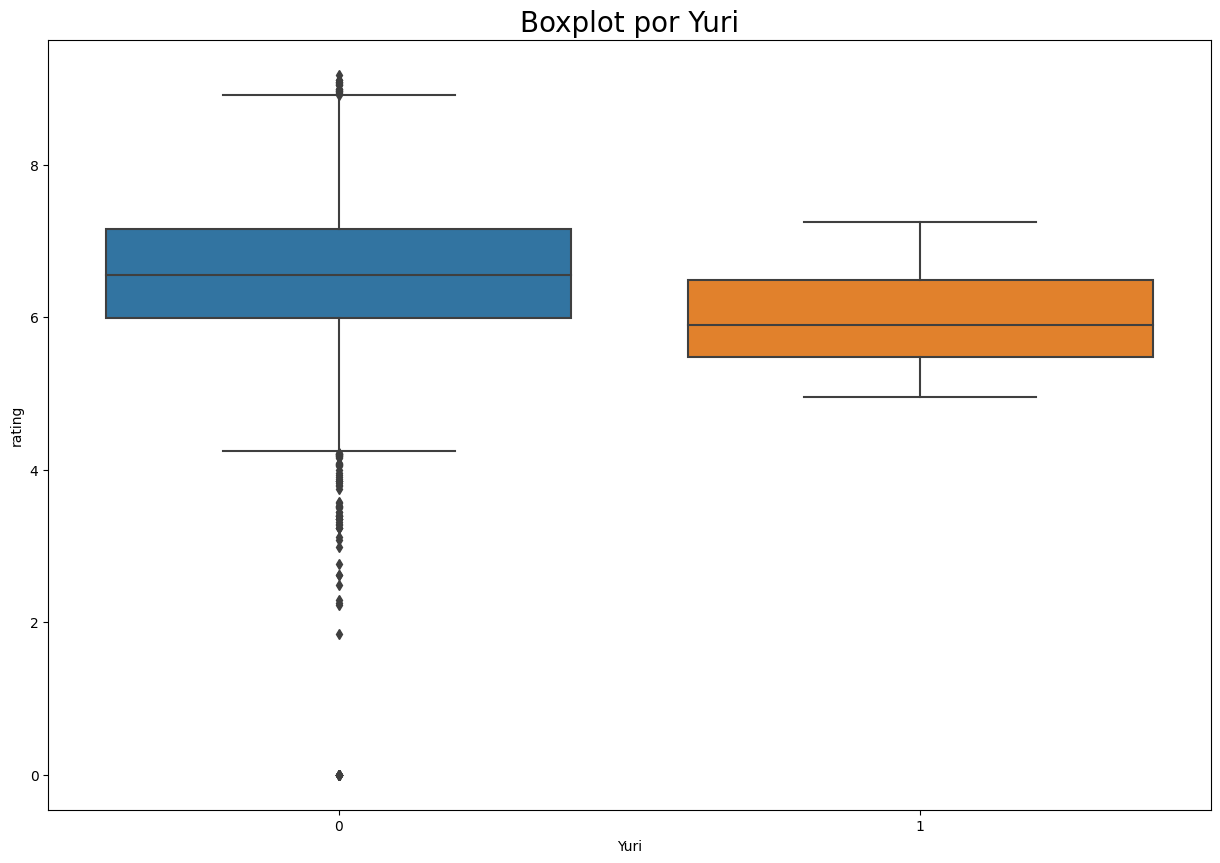

In [228]:
animes['Yuri'] = [1 if s >=0 else 0 for s in animes['genres'].str.find('Yuri')] 
plt.figure(figsize=(15, 10))
sns.boxplot(x="Yuri", y="rating", data=animes)
plt.title('Boxplot por Yuri', fontsize = 20)
plt.xlabel('Yuri')
plt.show()

Puedo observar que las medias y cuartiles son inferiores, puedo decir que la media de rating de este tipo de genero no es tan popular.